# Google Top Stories - An exploration

This dataset was collected during the pandemic, it contains headlines shown by Google Search.

The dataset is organized by year, month, date, hour, in a series of nested folders. The leaf folders contain JSON files with information about top stories. 

Your goal is to write first Python function that takes the name of the folder "GoogleTopStories" and stores the content of all the JSON files into a single CSV file. Once you have a CSV file, you can practice your pandas & seaborn skills in analyzing the data.

Some tips and ideas for analysis:
1. Use the Python command `os.walk` to iteratively traverse the nested subfolders. Account for hidden files that start with .
2. Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.
3. Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)
4. Create a heatmap that shows the distribution of domains across the 'story_position' values.
5. Create timeseries of unique articles per month by query type. (This is challenging.)

**Table of Contents**

1. [Traverse Directory and Create Dataframe](#1) 
2. [Parse URLs](#2)
3. [Create Barchart](#3)
4. [Create Heatmap](#4)
5. [Create Timeseries](#5)


## 1. Traverse Directory and Create Dataframe <a class="anchor" id="1"></a>

In [3]:
import os
import json
import pandas as pd
import seaborn

In [4]:
for root, dirs, files in os.walk(".", topdown=True):
    for name in files:
        print (os.path.join(root, name))
    for name in dirs:
        print (os.path.join(root, name))

./.DS_Store
./Exploring Google Top Stories.ipynb
./out.csv
./Intro Pandas
./GoogleTopStories
./.ipynb_checkpoints
./Intro Pandas/survey-responses.csv
./Intro Pandas/Working with Pandas - Tutorial.ipynb
./Intro Pandas/.ipynb_checkpoints
./Intro Pandas/.ipynb_checkpoints/Working with Pandas - Tutorial-checkpoint.ipynb
./Intro Pandas/.ipynb_checkpoints/week2-pandas-checkpoint.ipynb
./GoogleTopStories/.DS_Store
./GoogleTopStories/2021
./GoogleTopStories/2020
./GoogleTopStories/2021/.DS_Store
./GoogleTopStories/2021/02
./GoogleTopStories/2021/01
./GoogleTopStories/2021/02/.DS_Store
./GoogleTopStories/2021/02/03
./GoogleTopStories/2021/02/04
./GoogleTopStories/2021/02/05
./GoogleTopStories/2021/02/02
./GoogleTopStories/2021/02/07
./GoogleTopStories/2021/02/08
./GoogleTopStories/2021/02/01
./GoogleTopStories/2021/02/06
./GoogleTopStories/2021/02/03/10pm
./GoogleTopStories/2021/02/03/10am
./GoogleTopStories/2021/02/03/10pm/Covid-19.json
./GoogleTopStories/2021/02/03/10pm/Anthony Fauci.json
./G

In [5]:
def search_file(directory = None, file = None):
    # make sure input dir is valid
    assert os.path.isdir(directory)
    
    # explore current dir
    current_path, directories, files = os.walk(directory)
    
    # check for file in current dir
    if file in files:
        return os.path.join(directory,file)
    
    # handle empty subdirs
    elif directories == '':
        return None
    else:
        # loop through each subdir
        for new_directory in directories:
            # recursive call
            result = search_file(directory = os.path.join(directory, new_directory, file = file))
            
            if result:
                return result
            return None

In [6]:
def list_files(start_path):
    for root, dirs, files in os.walk(start_path):
        
        # filter hidden directories
        dirs[:] = [d for d in dirs if not d.startswith('.')]
        
        # filter hidden files
        files[:] = [f for f in files if not f.startswith('.')]
        
        for file in files:
            print(os.path.join(root, file))

In [7]:
start_path = "./GoogleTopStories"
print(list_files(start_path))

./GoogleTopStories/2021/02/03/10pm/Covid-19.json
./GoogleTopStories/2021/02/03/10pm/Anthony Fauci.json
./GoogleTopStories/2021/02/03/10pm/coronavirus symptoms.json
./GoogleTopStories/2021/02/03/10pm/coronavirus.json
./GoogleTopStories/2021/02/03/10pm/coronavirus test.json
./GoogleTopStories/2021/02/03/10am/Covid-19.json
./GoogleTopStories/2021/02/03/10am/Anthony Fauci.json
./GoogleTopStories/2021/02/03/10am/coronavirus symptoms.json
./GoogleTopStories/2021/02/03/10am/coronavirus.json
./GoogleTopStories/2021/02/04/10pm/Covid-19.json
./GoogleTopStories/2021/02/04/10pm/Anthony Fauci.json
./GoogleTopStories/2021/02/04/10pm/coronavirus symptoms.json
./GoogleTopStories/2021/02/04/10pm/coronavirus.json
./GoogleTopStories/2021/02/04/10pm/coronavirus test.json
./GoogleTopStories/2021/02/04/10am/Covid-19.json
./GoogleTopStories/2021/02/04/10am/Anthony Fauci.json
./GoogleTopStories/2021/02/04/10am/coronavirus symptoms.json
./GoogleTopStories/2021/02/04/10am/coronavirus.json
./GoogleTopStories/202

In [8]:
def load_json_files(start_path):
    json_data = []
    
    # traverse directory
    for root, dirs, files in os.walk(start_path):
        
        # filter hidden directories
        dirs[:] = [d for d in dirs if not d.startswith('.')]
        
        # filter hidden files
        files[:] = [f for f in files if not f.startswith('.')]
        
        for file in files:
            file_path = os.path.join(root, file)
            
            # read json content
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                    json_data += data
                except:
                    print(f"Error loading JSON file: {file_path}")
    return json_data

In [10]:
import csv

json_data = load_json_files("./GoogleTopStories")

with open("out.csv", 'w') as outfile:
    csvWriter = csv.DictWriter(outfile, 
                               fieldnames=['title', 'url', 'source', 'time', 'date', 'query', 'story_position', 'domain', 'category']) # get the key names as column names
    
    csvWriter.writeheader() # write the column names
    csvWriter.writerows(json_data) # write all rows

In [25]:
df = pd.DataFrame(json_data)
df.head()

,title,url,source,time,date,query,story_position,domain,category
0,Live Covid-19 News Updates: The Latest,https://www.nytimes.com/live/2021/02/03/world/...,The New York Times,2 hours ago,2021-02-03 22:00:00,Covid-19,1,www.nytimes.com,NaN
1,The latest on the coronavirus pandemic and vac...,https://www.cnn.com/world/live-news/coronaviru...,CNN,50 mins ago,2021-02-03 22:00:00,Covid-19,2,www.cnn.com,NaN
2,Chiefs' Daniel Kilgore releases photo of unfin...,https://www.foxnews.com/sports/chiefs-daniel-k...,Fox News,48 mins ago,2021-02-03 22:00:00,Covid-19,3,www.foxnews.com,NaN
3,Younger adults are biggest spreaders of Covid-...,https://www.cnn.com/2021/02/03/health/younger-...,CNN,35 mins ago,2021-02-03 22:00:00,Covid-19,4,www.cnn.com,NaN
4,Idaho’s daily average of new COVID-19 cases re...,https://www.idahostatesman.com/news/coronaviru...,Idaho Statesman,51 mins ago,2021-02-03 22:00:00,Covid-19,5,www.idahostatesman.com,NaN


## 2. Parse URLs <a class="anchor" id="2"></a>

Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.

In [12]:
# testing code from lecture
from urllib.parse import urlparse

oneurl = df.iloc[0]['url']

# get domain
urlparse(oneurl).netloc

'www.nytimes.com'

In [13]:
# create copy of df to test
df_test = df.copy()
df_test.head()

get_domain = lambda url: urlparse(oneurl).netloc
df_test["domain2"] = df_test["url"].apply(get_domain)

df_test.head()

,title,url,source,time,date,query,story_position,domain,category,domain2
0,Live Covid-19 News Updates: The Latest,https://www.nytimes.com/live/2021/02/03/world/...,The New York Times,2 hours ago,2021-02-03 22:00:00,Covid-19,1,www.nytimes.com,NaN,www.nytimes.com
1,The latest on the coronavirus pandemic and vac...,https://www.cnn.com/world/live-news/coronaviru...,CNN,50 mins ago,2021-02-03 22:00:00,Covid-19,2,www.cnn.com,NaN,www.nytimes.com
2,Chiefs' Daniel Kilgore releases photo of unfin...,https://www.foxnews.com/sports/chiefs-daniel-k...,Fox News,48 mins ago,2021-02-03 22:00:00,Covid-19,3,www.foxnews.com,NaN,www.nytimes.com
3,Younger adults are biggest spreaders of Covid-...,https://www.cnn.com/2021/02/03/health/younger-...,CNN,35 mins ago,2021-02-03 22:00:00,Covid-19,4,www.cnn.com,NaN,www.nytimes.com
4,Idaho’s daily average of new COVID-19 cases re...,https://www.idahostatesman.com/news/coronaviru...,Idaho Statesman,51 mins ago,2021-02-03 22:00:00,Covid-19,5,www.idahostatesman.com,NaN,www.nytimes.com


## 3. Create Barchart <a class="anchor" id="3"></a>

Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)

In [21]:
from collections import Counter
domain_counter = Counter(df['domain'])
top_10_domains = domain_counter.most_common(10)

top_10_domains

[('www.cnn.com', 1834),
 ('www.nytimes.com', 1246),
 ('www.washingtonpost.com', 826),
 ('www.foxnews.com', 801),
 ('www.cnbc.com', 577),
 ('www.npr.org', 543),
 ('www.nbcnews.com', 492),
 ('www.usatoday.com', 492),
 ('thehill.com', 477),
 ('nypost.com', 459)]

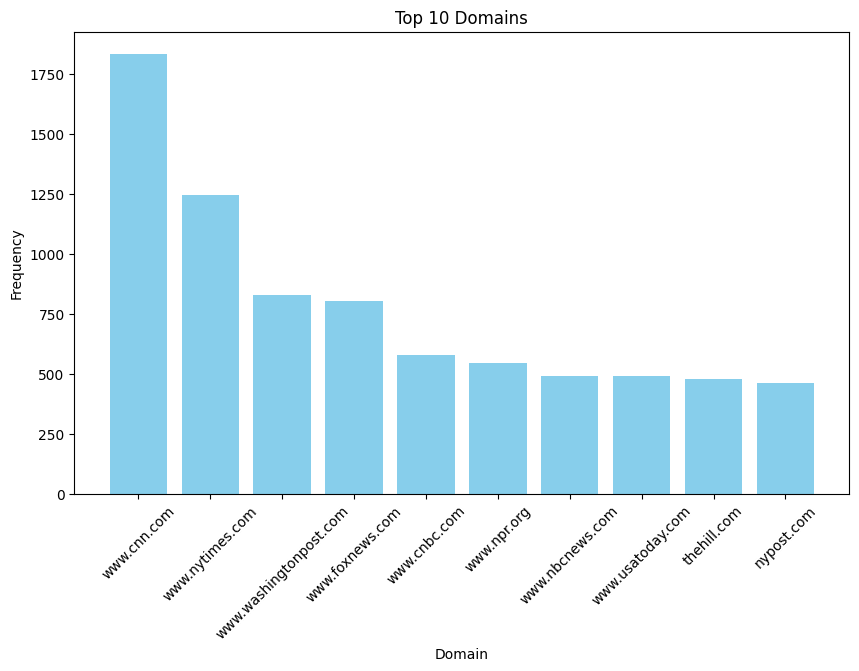

In [22]:
import matplotlib.pyplot as plt

domains = [domain for domain, _ in top_10_domains]
frequencies = [count for _, count in top_10_domains]

plt.figure(figsize=(10, 6))
plt.bar(domains, frequencies, color='skyblue')
plt.title('Top 10 Domains')
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 4. Create a Heatmap <a class="anchor" id="4"></a>
Create a heatmap that shows the distribution of domains across the 'story_position' values.

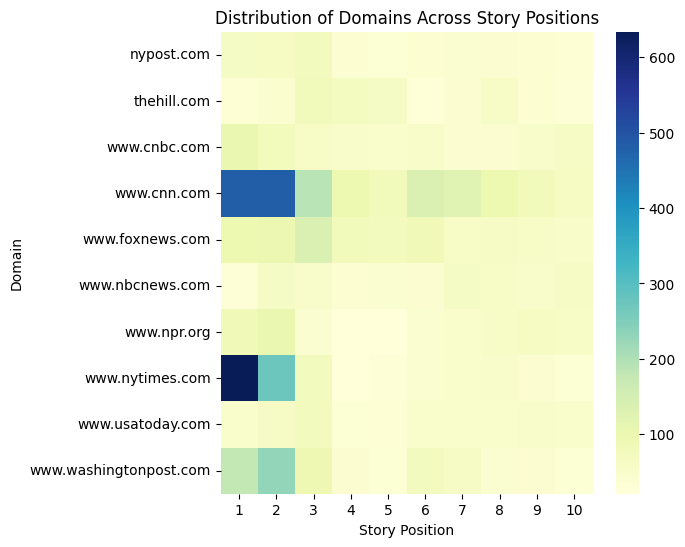

In [32]:
import seaborn as sns

# for top 10 domains only
top_10_domains_df = df[df['domain'].isin([domain for domain, _ in top_10_domains])]

heatmap_data_2 = top_10_domains_df.pivot_table(index='domain', columns='story_position', aggfunc='size', fill_value=0)

plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data_2, cmap='YlGnBu')
plt.title('Distribution of Domains Across Story Positions')
plt.xlabel('Story Position')
plt.ylabel('Domain')
plt.show()

<a class="anchor" id="5"></a>
## 5. Create Timeseries
Create timeseries of unique articles per month by query type. (This is challenging.)

In [ ]:
from datetime import datetime
